In [1]:
from importlib import reload
from two_transmons import Rabi
reload(Rabi)
from two_transmons.Rabi import *
import two_transmons.DoubleTransmonSystem
from two_transmons.DoubleTransmonSystem import *
import two_transmons.VacuumRabiSimulation
from two_transmons.VacuumRabiSimulation import *
import single_transmon.Transmon
from single_transmon.Transmon import *
from ReadoutResonator import *
from qutip import *
from tqdm.notebook import tqdm
from two_transmons.ZPulse import *
from importlib import reload
import two_transmons.ParallelCalculations
from two_transmons.ParallelCalculations import *
from two_transmons.CalcTime import *
from two_transmons.Tomography import *
from scipy.linalg import cholesky
from scipy.optimize import *

## Rabi oscillations with different drive amplitudes


In [2]:
Nc = 7
Ec1 = 0.25 * 2 * np.pi
Ec2 = 1.03*Ec1
Ecc = 0*0.01/1.2**2 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element
Ej1 = Ec1 * 100
Ej2 = Ec2 * 100
d = 0.2

T1_1, T2_1 = 10e4, 5e4
T1_2, T2_2 = 5e4, 1e5

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc, 3, 1)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc, 3, 2)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)
r = ReadoutResonator(6, 1118, 1964, phi=0.29)
r.set_qubit_parameters(.05, 0.05, 5, 5.3, .2, .2)
farg=cook_farg(20,0.2)
params=farg[0]['params']
Ts = linspace(0, params["finish"], params['t_points'])

T = Tomography(dts, Ts, params, r)
Rabi = Tomography(dts, Ts, params, r)  
 




/tmp/ipykernel_1056009/1041533926.py:19: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  Ts = linspace(0, params["finish"], params['t_points'])


(-1.0, 1.0)

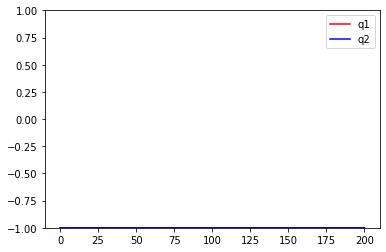

In [3]:
Rabi = Tomography(dts, Ts, params, r) 
Rabi._pi_duration = 20
fig, ax = subplots(1,1)

dm = Rabi.run_iswap_check()
qubit1_z = expect(Rabi.build_2qubit_operator('Z','id'), dm.states)
qubit2_z = expect(Rabi.build_2qubit_operator('id','Z'), dm.states)
ax.plot(Rabi._Ts,qubit1_z,'r',label='q1') #,ylim=[0,1])
ax.plot(Rabi._Ts,qubit2_z,'b', label='q2')
ax.legend()
ax.set_ylim([-1,1.00])



In [8]:
dm.states[500]

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [4]:
E0 = dts.gg_state(0, 1/2, True)[1]
E10 = dts.e_state(0, 1/2, 1, True)[1]
E01 = dts.e_state(0, 1/2, 2, True)[1]
freqs = ((E10-E0)/2/pi,(E01-E0)/2/pi)

In [5]:
freq1_res, freq2_res = freqs

In [ ]:
Rabi = Tomography(dts, Ts, params, r) 
Rabi._options = Options(nsteps=20000, store_states = True)
Rabi._c_ops = Rabi._dts.c_ops(0, 1 / 2)
amplitudes = linspace (0, 10 ,12)
Rabi._pi_duration = 300
fig, axes = subplots (3,4,sharex=False, sharey=True,figsize=[20,15])
axes = axes.flatten()
for ind in range (12):
    Rabi._drive_amplitude = 0.01*2*pi/2*amplitudes[ind]
    dm = Rabi._tomo_step([(Rabi._pi_duration,0),(0,0)], Rabi._freqs)
    qubit1_z = expect(Rabi.build_2qubit_operator(q1_ax = 'Z'),dm.states)
    im = axes[ind].plot(Ts,qubit1_z) #,ylim=[0,1])
    axes[ind].set_ylim([-1,1])
    axes[ind].set(title = 'amplitude =' + str(amplitudes[ind]))
#fig.savefig('14.09.2021 qubit1_Rabi_freq_fixed' + 'ampl 0-10.png')


/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/tmp/ipykernel_416991/1040923828.py:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  amplitudes = linspace (0, 10 ,12)


/tmp/ipykernel_414728/613998498.py:2: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  amplitudes = linspace (0, 10 ,12)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dt

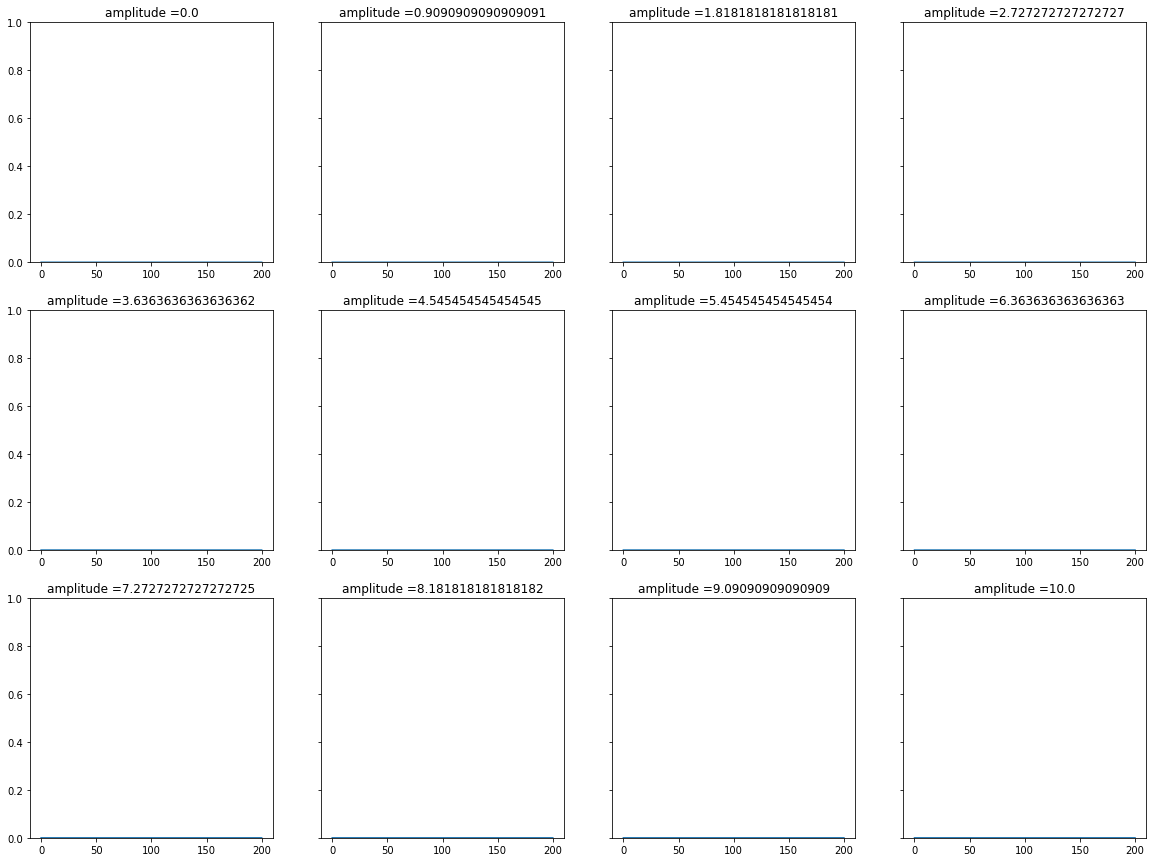

In [11]:
Rabi = Tomography(dts, Ts, params, r) 
amplitudes = linspace (0, 10 ,12)
fig, axes = subplots (3,4,sharex=False, sharey=True,figsize=[20,15])
axes = axes.flatten()
for ind in range (12):
    Rabi._drive_amplitude = 0.01*2*pi/2*amplitudes[ind]
    dm = Rabi.run_iswap_check()
    qubti2_partial_trace = []
    for res in dm.states:
        q2 = res.ptrace(1)
        q2 = q2*q2.dag()
        qubti2_partial_trace.append(q2[1,1])
    im = axes[ind].plot(Ts,qubti2_partial_trace) #,ylim=[0,1])
    axes[ind].set_ylim([0,1])
    axes[ind].set(title = 'amplitude =' + str(amplitudes[ind]))
#fig.savefig('14.09.2021 qubit1_Rabi_freq_fixed' + 'ampl 0-10.png')


## Drive frequency calibration

### Qubit 1

/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/tmp/ipykernel_414728/3863823852.py:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  freqs = linspace (6.80, 6.82, 12)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82:

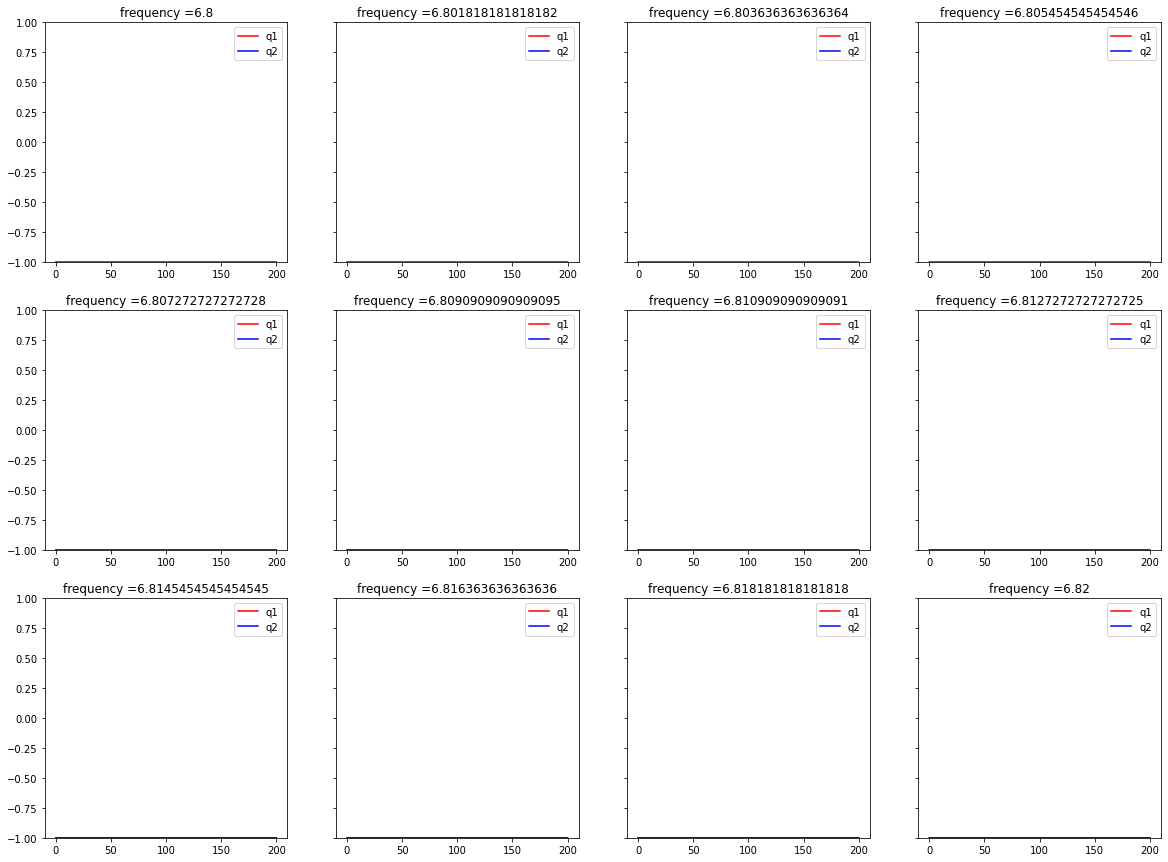

In [9]:
Rabi = Tomography(dts, Ts, params, r) 
Rabi.set_pi_duration(150)
freqs = linspace (6.80, 6.82, 12)
fig, axes = subplots (3,4,sharex=False, sharey=True,figsize=[20,15])
axes = axes.flatten()
for ind, freq in enumerate(freqs):
    Rabi = Tomography(dts, Ts, params, r) 
    #Rabi.set_pi_duration(35)
    Rabi.run_rabi((freq,freq2_res),1)
    qubti1_partial_trace = []
    qubit1_z = expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_rabi.states)
    qubit2_z = expect(Rabi.build_2qubit_operator('id','Z'), Rabi._results_rabi.states)
    #for res in Rabi._results_rabi.states:
        #q1 = res.ptrace(0)
        #q1 = q1*q1.dag()
        #qubti1_partial_trace.append(q1[1,1])
    #im = axes[ind].plot(Ts,qubti1_partial_trace) #,ylim=[0,1])
    im = axes[ind].plot(Ts,qubit1_z,'r',label='q1') #,ylim=[0,1])
    axes[ind].plot(Ts,qubit2_z,'b', label='q2')
    axes[ind].legend()
    axes[ind].set_ylim([-1,1])
    axes[ind].set(title = 'frequency =' + str(freq))
#fig.savefig('28.09.2021 ' + '1_qubit_freq_scan.png')

In [8]:
E0 = Rabi._dts.gg_state(0, 1/2, True)[1]
E10 = Rabi._dts.e_state(0, 1/2, 1, True)[1]
E01 = Rabi._dts.e_state(0, 1/2, 2, True)[1]
E11 = Rabi._dts.ee_state(0, 1/2, True)[1]
print ((E10 - E0)/2/pi)

6.811313561144462


In [9]:
(E01-E0)/2/pi

4.691649905414878

In [10]:
dts.e_state(0, 1/2, 2)

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

### Qubit 2

<ipython-input-3-a430bf6bfc18>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  freqs = linspace (4.580, 4.692, 12)


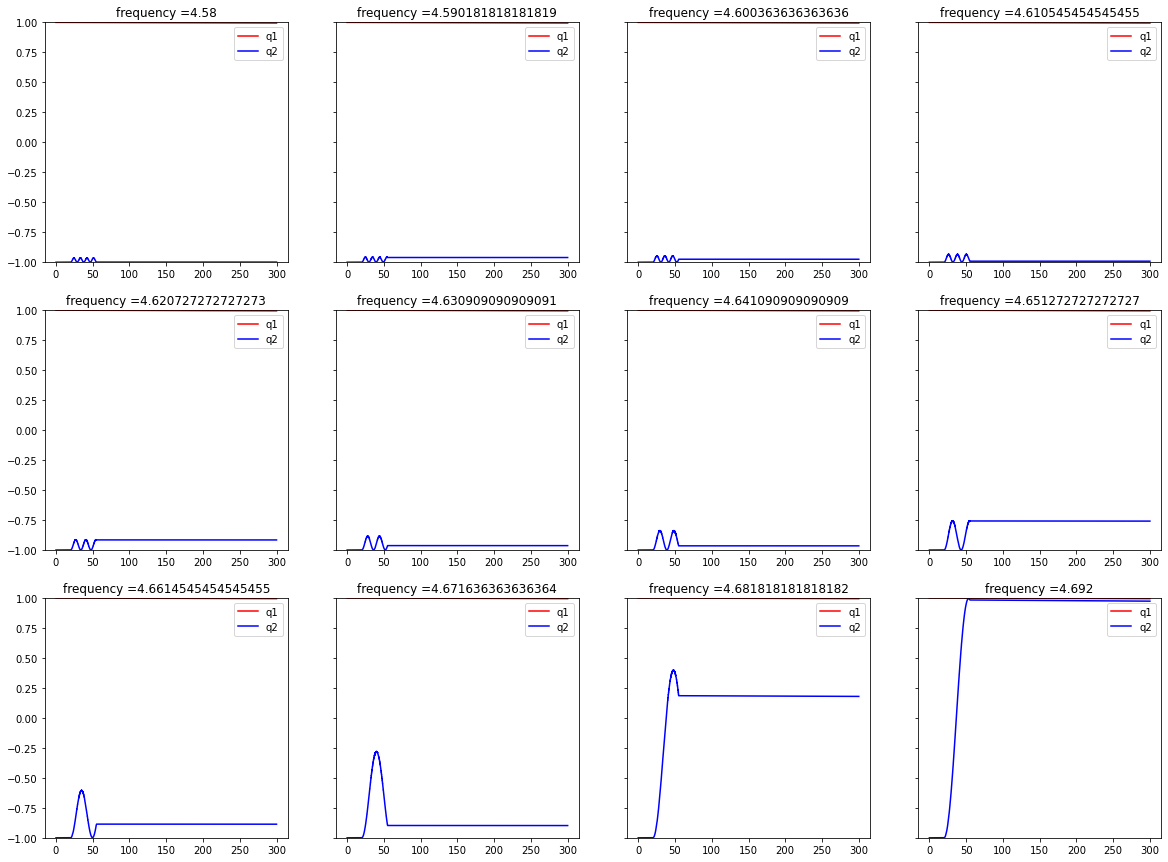

In [3]:

freqs = linspace (4.580, 4.692, 12)
fig, axes = subplots (3,4,sharex=False, sharey=True,figsize=[20,15])
axes = axes.flatten()
for ind, freq in enumerate(freqs):
    Rabi = Tomography(dts, Ts, params, r) 
    Rabi.set_pi_duration(35)
    Rabi.run_rabi((freq1_res,freq),2)
    qubit1_z = []
    qubit2_z = []
    qubit1_z = expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_rabi.states)
    qubit2_z = expect(Rabi.build_2qubit_operator('id','Z'), Rabi._results_rabi.states)
   # qubit2_partial_trace = []
   # for res in Rabi._results_rabi.states:
   #     q2 = res.ptrace(1)
   #     q2 = q2*q2.dag()
   #     qubit2_partial_trace.append(q2[1,1])
    im = axes[ind].plot(Ts,qubit1_z,'r',label='q1') #,ylim=[0,1])
    axes[ind].plot(Ts,qubit2_z,'b', label='q2')
    axes[ind].legend()
    
    axes[ind].set_ylim([-1,1])
    axes[ind].set(title = 'frequency =' + str(freq))
#fig.savefig('28.09.2021 ' + '2_qubit_freq_scan.png')

/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


[Text(0.5, 1.0, 'frequency =4.691')]

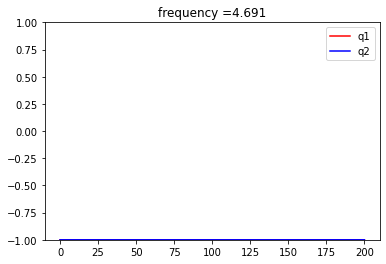

In [11]:
Rabi = Tomography(dts, Ts, params, r) 
Rabi.set_pi_duration(33.45)
fig, ax = subplots(1,1)
freq=4.691
Rabi.run_rabi((freq1_res,freq),2)
qubit1_z = expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_rabi.states)
qubit2_z = expect(Rabi.build_2qubit_operator('id','Z'), Rabi._results_rabi.states)
ax.plot(Ts,qubit1_z,'r',label='q1') #,ylim=[0,1])
ax.plot(Ts,qubit2_z,'b', label='q2')
ax.legend()
ax.set_ylim([-1,1.00])
ax.set(title = 'frequency =' + str(freq))


/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


NameError: name 'freq1_res' is not defined

In [5]:
expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_rabi.states)

array([-0.99999859, -0.99999859, -0.9999986 , ..., -0.99995883,
       -0.99995881, -0.99995879])

In [13]:
qubit1_z

array([-0.99999859, -0.99999859, -0.9999986 , ...,  0.98255078,
        0.98255056,  0.98255034])

## Determination of the pi pulse duration

/home/alexeitolstobrov/server/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alexeitolstobrov/server/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


'\nf1 = interp1d(Ts, -real(qubit1), kind=\'cubic\')\nt_rabi_1 = minimize(f1, 8).x\nprint ("t pi 1 =", t_rabi_1)\nprint (f1(t_rabi_1))\nf2 = interp1d(Ts, -real(qubit2), kind=\'cubic\')\nt_rabi_2 = minimize(f2, 8).x\nprint ("t pi 2 =", t_rabi_2)\nprint (f2(t_rabi_2))\n'

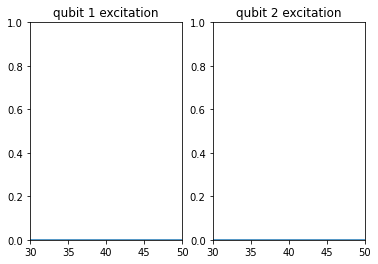

In [3]:
'''
For this cell to work you should define large duration of pi-pulse
'''
from scipy.interpolate import interp1d
from scipy.optimize import minimize

T.set_pi_duration(37)
T.run()
qubit1 = []
qubit2 = []
for res in T._results[-2].states:
    state1 = res.ptrace(0)
    state1 = state1*state1.dag()
    state2 = res.ptrace(1)
    state2 = state2*state2.dag()
    qubit1.append(state1[1,1])
    qubit2.append(state2[1,1])
    
fig, ax = subplots (1,2)
ax[0].plot (Ts, qubit1)
ax[0].set(ylim = [0,1], xlim = [30,50])
ax[0].set(title = 'qubit 1 excitation')
ax[1].plot (Ts, qubit2)
ax[1].set(ylim = [0,1], xlim = [30,50])
ax[1].set(title = 'qubit 2 excitation')

#print(argmax (real(qubit1)))
#print(max (real(qubit1)))
'''
f1 = interp1d(Ts, -real(qubit1), kind='cubic')
t_rabi_1 = minimize(f1, 8).x
print ("t pi 1 =", t_rabi_1)
print (f1(t_rabi_1))
f2 = interp1d(Ts, -real(qubit2), kind='cubic')
t_rabi_2 = minimize(f2, 8).x
print ("t pi 2 =", t_rabi_2)
print (f2(t_rabi_2))
'''




In [33]:
f1 = interp1d(Ts, -real(qubit1), kind='cubic')
t_rabi_1 = minimize(f1, 46).x
print ("t pi 1 =", t_rabi_1)
print (f1(t_rabi_1))
f2 = interp1d(Ts, -real(qubit2), kind='cubic')
t_rabi_2 = minimize(f2, 43.8).x
print ("t pi 2 =", t_rabi_2)
print (f2(t_rabi_2))

t pi 1 = [43.32819617]
[-0.99925391]
t pi 2 = [43.789089]
[-0.99717283]


<ipython-input-33-9b2b26f4d5c0>:1: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  f1 = interp1d(Ts, -real(qubit1), kind='cubic')
<ipython-input-33-9b2b26f4d5c0>:5: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  f2 = interp1d(Ts, -real(qubit2), kind='cubic')


t pi 1 = [43.32819617]
[-0.99925391]
t pi 2 = [43.789089]
[-0.99717283]


<ipython-input-33-9b2b26f4d5c0>:1: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  f1 = interp1d(Ts, -real(qubit1), kind='cubic')
<ipython-input-33-9b2b26f4d5c0>:5: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  f2 = interp1d(Ts, -real(qubit2), kind='cubic')


In [22]:
f1(44)

array(-0.99828135)

array(-0.99828135)

array(-0.99957295)

In [11]:
T._H

AttributeError: 'Tomography' object has no attribute '_H'